## Data Wrangling

In [1]:
pip install googledrivedownloader

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import os

# Define the IDs of the files on Google Drive
file_ids = {
    "ds_master_user_static.csv": "12c_wiATQgQkNwTIDrUMqaLWx1DIDh5i5",
    "ds_deposit.csv": "1G4ljicUM0ay2IxvlStmNUHdSMiRRJlVp",
    "ds_trade.csv": "1P_3M-QK_L2JM9vqbiZHAtyrH4ylqoWyn",
    "ds_withdrawal.csv": "12qMMsZvsKY5cAfbu_BQrI696XwbtzKTw",
    "ds_user_balance.csv": "1d5EuMf4iaM397awiv50DYgDXtMnWR5O6",
    "ds_price_data.csv": "1UT_7yjUJB2NVZChqg33T0SG7ux-NYRu3"
}

# Define the destination folder to download the files
download_folder = r"C:\Users\Catalina\Desktop\DataFiles"

# Download the files from Google Drive
for file_name, file_id in file_ids.items():
    gdd.download_file_from_google_drive(file_id=file_id,
                                        dest_path=os.path.join(download_folder, file_name))

# Create a dictionary to store the DataFrames
data_frames = {}

# Load the CSV files into DataFrames and store them in the dictionary
for file_name in file_ids.keys():
    df_name = file_name.replace(".csv", "")  # Get the DataFrame name
    file_path = os.path.join(download_folder, file_name)
    data_frames[df_name] = pd.read_csv(file_path)

In [3]:
for df_name, df in data_frames.items():
    print(f"First 5 rows of {df_name}:\n")
    print(df.head(5))
    print("\n" + "="*40 + "\n")  # Visual separator between DataFrames

First 5 rows of ds_master_user_static:

   user_id                    lastseen gender                     created  \
0     1609  2020-01-07 21:54:56.768+00      M  2020-01-07 21:54:56.766+00   
1     1612  2020-01-08 17:13:17.436+00      M  2020-01-08 17:13:17.434+00   
2     1613   2020-01-08 19:20:50.17+00      M  2020-01-08 19:20:50.161+00   
3     1615  2020-01-08 23:31:22.742+00    NaN  2020-01-08 23:28:54.309+00   
4     1628  2020-01-09 21:55:09.154+00      M  2020-01-09 21:55:09.153+00   

  language country_code  status is_business         dob  
0       es           MX  active           f  1992-09-07  
1       en           AR  active           f  1992-05-19  
2       en           AR  active           f  1986-08-26  
3       en           MX  active           f         NaN  
4       es           AR  active           f  1986-12-12  


First 5 rows of ds_deposit:

   Unnamed: 0                     created  user_id method currency  \
0           1  2020-12-22 02:47:47.184+00     16

In [4]:
# Display the data types of each DataFrame
for df_name, df in data_frames.items():
    print(f"Data types of {df_name}:\n")
    print(df.dtypes)
    print("\n" + "="*40 + "\n")  # Visual separator between DataFrames

Data types of ds_master_user_static:

user_id          int64
lastseen        object
gender          object
created         object
language        object
country_code    object
status          object
is_business     object
dob             object
dtype: object


Data types of ds_deposit:

Unnamed: 0      int64
created        object
user_id         int64
method         object
currency       object
amount        float64
dtype: object


Data types of ds_trade:

trade_id            int64
created            object
major_user_id       int64
major_currency     object
amount            float64
major_fee         float64
rate              float64
minor_user_id       int64
minor_currency     object
value             float64
minor_fee         float64
dtype: object


Data types of ds_withdrawal:

Unnamed: 0      int64
created        object
user_id         int64
method         object
currency       object
amount        float64
dtype: object


Data types of ds_user_balance:

date            object
user

In [5]:
data_frames["ds_deposit"]

,Unnamed: 0,created,user_id,method,currency,amount
0,1,2020-12-22 02:47:47.184+00,1672,adm,gnt,9.798667e+05
1,2,2020-12-21 20:13:17.757+00,1672,spei,mxn,1.997648e+08
2,3,2020-12-17 15:56:47.798+00,1726,bt,btc,1.089150e-03
3,4,2020-12-16 20:38:44.443+00,1726,bt,btc,1.215840e-03
4,5,2020-12-16 20:33:28.546+00,1726,bt,btc,1.216380e-03
...,...,...,...,...,...,...
1457,1458,2020-12-22 20:23:33.666+00,8026,adm,btc,1.100000e+01
1458,1459,2020-12-22 20:23:33.629+00,8026,adm,bsv,1.100000e+01
1459,1460,2020-12-22 20:23:33.593+00,8026,adm,bch,1.100000e+01
1460,1461,2020-12-22 20:23:33.534+00,8026,adm,bat,1.000000e+00


In [6]:
# Remove the "Unnamed: 0" column from the ds_withdrawal and ds_deposit DataFrames
for df_name in ["ds_withdrawal", "ds_deposit"]:
    data_frames[df_name] = data_frames[df_name].drop(columns=["Unnamed: 0"])

# Convert the "created" column in all DataFrames to timestamp data type
for df_name, df in data_frames.items():
    if "created" in df.columns:
        df["created"] = pd.to_datetime(df["created"])

# Display the first 5 rows of the ds_withdrawal.csv DataFrame after the changes
print("First 5 rows of ds_withdrawal.csv after changes:\n")
print(data_frames["ds_withdrawal"].head(5))

First 5 rows of ds_withdrawal.csv after changes:

                           created  user_id     method currency  amount
0 2020-12-10 18:46:21.384000+00:00     1718  eth_erc20      usd   10.84
1 2020-12-08 17:11:58.036000+00:00     1718  eth_erc20      usd   12.01
2 2020-12-10 21:53:44.504000+00:00     1718         bt      btc    0.01
3 2020-12-01 21:46:25.935000+00:00     1718         bt      eth    1.00
4 2020-12-30 23:52:36.779000+00:00     3309         bt      mxn  200.00


# Deposits & withdrawals matters

### Get the number of users that deposit and withdraw on a weekly basis

In [7]:
# Group unique users per week in ds_withdrawal
withdrawal_user_counts = data_frames["ds_withdrawal"].groupby(pd.Grouper(key='created', freq='W-Mon'))['user_id'].nunique()

# Group unique users per week in ds_deposit
deposit_user_counts = data_frames["ds_deposit"].groupby(pd.Grouper(key='created', freq='W-Mon'))['user_id'].nunique()

# Calculate weekly averages
withdrawal_user_avg = withdrawal_user_counts.mean()
deposit_user_avg = deposit_user_counts.mean()

# Display the results
print("Number of unique users per week in ds_withdrawal:\n")
print(withdrawal_user_counts)
print("\nWeekly average in ds_withdrawal:", withdrawal_user_avg)

print("\n" + "="*40 + "\n")

print("Number of unique users per week in ds_deposit:\n")
print(deposit_user_counts)
print("\nWeekly average in ds_deposit:", deposit_user_avg)


Number of unique users per week in ds_withdrawal:

created
2020-12-07 00:00:00+00:00    19
2020-12-14 00:00:00+00:00    13
2020-12-21 00:00:00+00:00     9
2020-12-28 00:00:00+00:00     4
2021-01-04 00:00:00+00:00     4
Freq: W-MON, Name: user_id, dtype: int64

Weekly average in ds_withdrawal: 9.8


Number of unique users per week in ds_deposit:

created
2020-12-07 00:00:00+00:00    18
2020-12-14 00:00:00+00:00    11
2020-12-21 00:00:00+00:00    12
2020-12-28 00:00:00+00:00     7
2021-01-04 00:00:00+00:00     5
Freq: W-MON, Name: user_id, dtype: int64

Weekly average in ds_deposit: 10.6


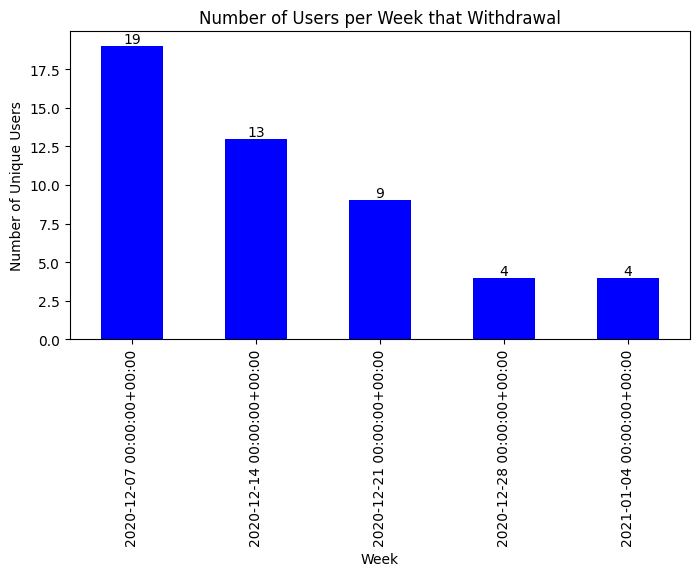

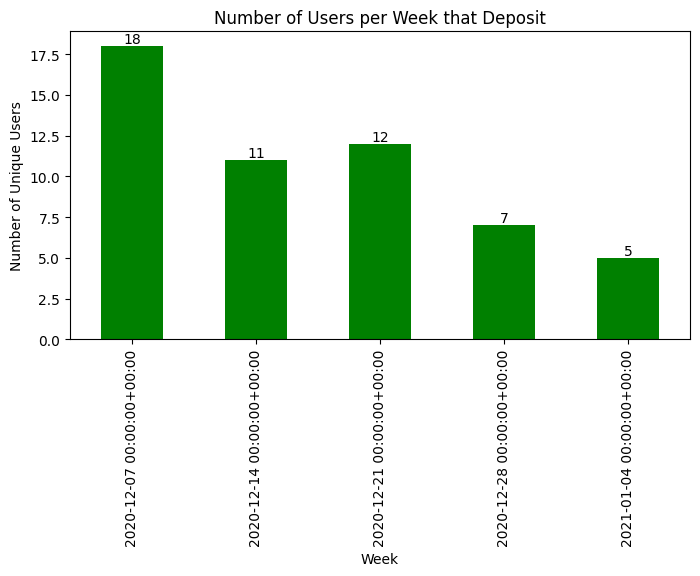

In [8]:
import matplotlib.pyplot as plt

# Create a bar chart for ds_withdrawal with value labels
plt.figure(figsize=(8, 4))
ax = withdrawal_user_counts.plot(kind='bar', color='blue')
plt.title('Number of Users per Week that Withdrawal')
plt.xlabel('Week')
plt.ylabel('Number of Unique Users')

# Add value labels on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Create a bar chart for ds_deposit with value labels
plt.figure(figsize=(8, 4))
ax = deposit_user_counts.plot(kind='bar', color='green')
plt.title('Number of Users per Week that Deposit')
plt.xlabel('Week')
plt.ylabel('Number of Unique Users')

# Add value labels on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


### Get the weekly Net Deposited amount in USD

In [9]:
# Group and sum by week and unique values of the 'currency' column in ds_withdrawal
withdrawal_grouped = data_frames["ds_withdrawal"].groupby([pd.Grouper(key='created', freq='W-Mon'), 'currency'])['amount'].sum()
withdrawal_df = withdrawal_grouped.unstack()

# Group and sum by week and unique values of the 'currency' column in ds_deposit
deposit_grouped = data_frames["ds_deposit"].groupby([pd.Grouper(key='created', freq='W-Mon'), 'currency'])['amount'].sum()
deposit_df = deposit_grouped.unstack()

# Display the DataFrame for ds_withdrawal
print("Grouped and summed DataFrame for ds_withdrawal:")
print(withdrawal_df)

print("\n" + "="*40 + "\n")

# Display the DataFrame for ds_deposit
print("Grouped and summed DataFrame for ds_deposit:")
print(deposit_df)


Grouped and summed DataFrame for ds_withdrawal:
currency                      ars       bat       bch        btc  dai  \
created                                                                 
2020-12-07 00:00:00+00:00  2001.0  5.391893  2.042749   5.560138  5.6   
2020-12-14 00:00:00+00:00     NaN       NaN       NaN  17.022819  NaN   
2020-12-21 00:00:00+00:00     NaN       NaN       NaN   0.006954  5.0   
2020-12-28 00:00:00+00:00     NaN       NaN       NaN   0.000010  NaN   
2021-01-04 00:00:00+00:00     NaN       NaN       NaN        NaN  NaN   

currency                          eth  gnt  ltc  mana         mxn   tusd  \
created                                                                    
2020-12-07 00:00:00+00:00   23.060137  1.0  1.0   1.0    83247.81  16.09   
2020-12-14 00:00:00+00:00  100.088934  NaN  NaN   NaN  1244543.04   7.18   
2020-12-21 00:00:00+00:00         NaN  NaN  NaN   NaN    60565.62    NaN   
2020-12-28 00:00:00+00:00         NaN  NaN  NaN   NaN    263

In [10]:
withdrawal_df

currency,ars,bat,bch,btc,dai,eth,gnt,ltc,mana,mxn,tusd,usd,xrp
created,,,,,,,,,,,,,
2020-12-07 00:00:00+00:00,2001.0,5.391893,2.042749,5.560138,5.6,23.060137,1.0,1.0,1.0,83247.81,16.09,1071.17,203.0
2020-12-14 00:00:00+00:00,NaN,NaN,NaN,17.022819,NaN,100.088934,NaN,NaN,NaN,1244543.04,7.18,10546.61,NaN
2020-12-21 00:00:00+00:00,NaN,NaN,NaN,0.006954,5.0,NaN,NaN,NaN,NaN,60565.62,NaN,NaN,0.1
2020-12-28 00:00:00+00:00,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,NaN,NaN,26367.48,NaN,NaN,NaN
2021-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13548.52,NaN,NaN,NaN


In [11]:
# Filter unique values of 'major_currency' using the most recent 'date'
latest_prices = data_frames["ds_price_data"].sort_values(by='date', ascending=False).drop_duplicates(subset='major_currency')

# Create the new DataFrame ds_price_data_usd with columns ['major_currency', 'usd']
ds_price_data_usd = latest_prices[['major_currency', 'usd']].copy()

# Display the new DataFrame ds_price_data_usd
print("New DataFrame ds_price_data_usd:")
print(ds_price_data_usd)

New DataFrame ds_price_data_usd:
    major_currency         usd
367            mxn      0.0502
361            brl      0.1925
356            ltc    127.4232
357            dai      1.0106
358            eth    749.2883
360            bch    351.4399
359           tusd      1.0069
362            btc  28701.9945
363            gnt      0.1760
364            xrp      0.2200
365            usd      1.0000
366            ars      0.0076
352            bat      0.6032
277           mana      0.0362


In [12]:
# Transpose withdrawal_df using the .transpose() method
withdrawal_df_T = withdrawal_df.transpose()

# Transpose deposit_df using the .transpose() method
deposit_df_T = deposit_df.transpose()

New DataFrame with the total sum:
                           Net Deposited amount in USD
created                                               
2020-12-07 00:00:00+00:00                183046.468307
2020-12-14 00:00:00+00:00                636614.231574
2020-12-21 00:00:00+00:00                  3245.066525
2020-12-28 00:00:00+00:00                  1323.934516
2021-01-04 00:00:00+00:00                   680.135704


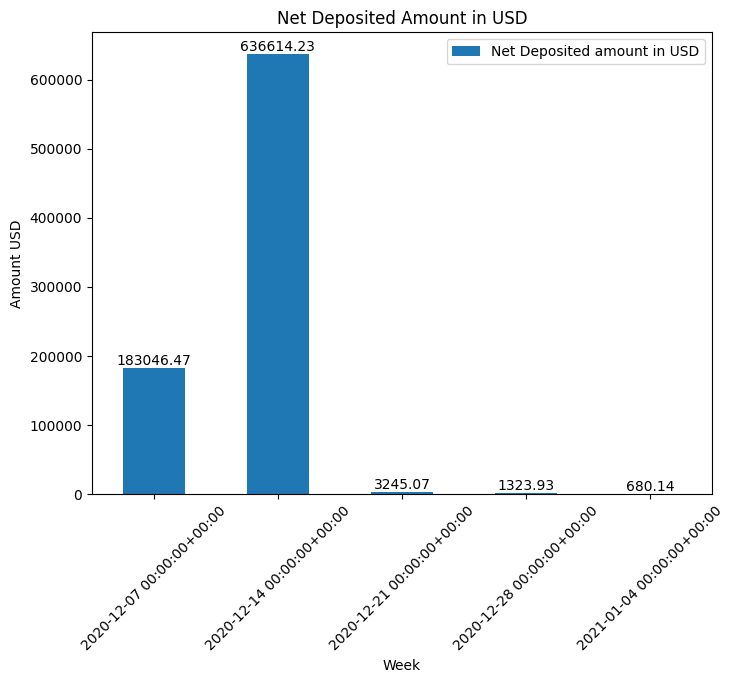

In [13]:
# Convert the 'major_currency' column in ds_price_data_usd to a list
major_currency_list = ds_price_data_usd['major_currency'].tolist()

# Multiply the values in the transposed_df_1 DataFrame according to major_currency and 'usd' column in ds_price_data_usd
for currency in major_currency_list:
    if currency in withdrawal_df_T.index:
        usd_value = ds_price_data_usd.loc[ds_price_data_usd['major_currency'] == currency, 'usd'].values[0]
        withdrawal_df_T.loc[currency] *= usd_value

# Sum all the rows in the withdrawal_df_T DataFrame after the multiplications
total_sum = withdrawal_df_T.sum()

# Create a new DataFrame for the total sum
net_deposited_withdrawal_df = pd.DataFrame({'Net Deposited amount in USD': total_sum})

# Show the new DataFrame
print("New DataFrame with the total sum:")
print(net_deposited_withdrawal_df)

# Create a bar chart
net_deposited_withdrawal_df.plot(kind='bar', figsize=(8, 6))
plt.title('Net Deposited Amount in USD')
plt.xlabel('Week')
plt.ylabel('Amount USD')
plt.xticks(rotation=45)

# Add labels to each bar
for i, value in enumerate(total_sum):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


In [14]:
deposit_df_T

created,2020-12-07 00:00:00+00:00,2020-12-14 00:00:00+00:00,2020-12-21 00:00:00+00:00,2020-12-28 00:00:00+00:00,2021-01-04 00:00:00+00:00
currency,,,,,
ars,2.510509e+06,1.090010e+05,1.000000e+06,2.110000e+02,1.000000e+06
bat,2.001160e+05,1.102000e+03,1.000000e+06,2.000000e+00,1.000000e+06
bch,2.001090e+05,1.101200e+04,1.000000e+06,1.200000e+01,1.000000e+06
brl,1.204100e+06,1.020010e+05,1.000000e+06,1.110000e+02,2.000000e+06
bsv,2.001080e+05,1.003000e+03,1.000000e+06,1.200000e+01,1.000000e+06
btc,2.002256e+05,1.020010e+03,1.000000e+06,1.200000e+01,1.000038e+06
dai,2.003670e+05,1.003000e+03,1.005005e+06,1.011000e+03,1.000000e+06
etc,2.001080e+05,1.003000e+03,1.000000e+06,1.200000e+01,1.000000e+06
eth,2.001330e+05,1.103000e+03,1.000000e+06,1.120000e+02,NaN


New DataFrame with the total sum:
                           Net Deposited amount in USD
created                                               
2020-12-07 00:00:00+00:00                 5.995238e+09
2020-12-14 00:00:00+00:00                 3.421630e+07
2020-12-21 00:00:00+00:00                 2.994749e+10
2020-12-28 00:00:00+00:00                 1.065039e+07
2021-01-04 00:00:00+00:00                 2.906437e+10


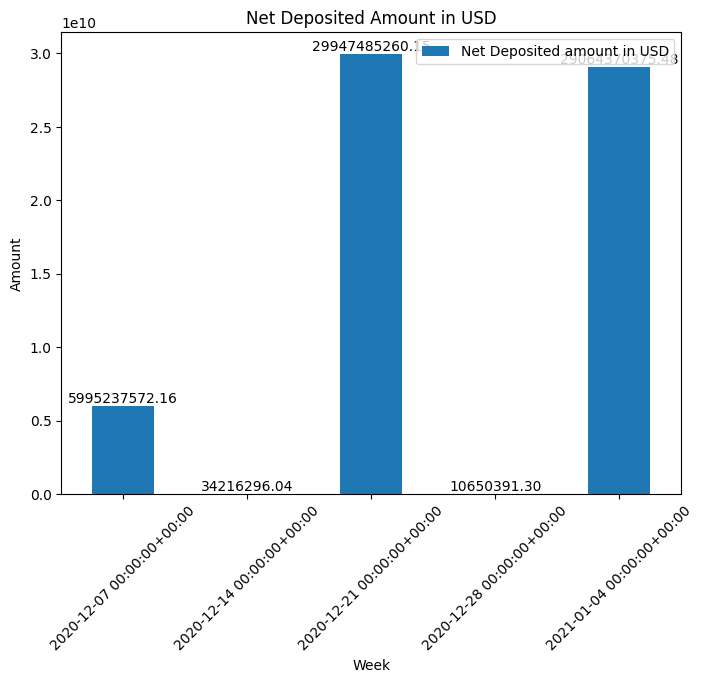

In [15]:
# Convert the 'major_currency' column in ds_price_data_usd to a list
major_currency_list = ds_price_data_usd['major_currency'].tolist()

# Multiply the values in the deposit_df_T DataFrame according to major_currency and 'usd' column in ds_price_data_usd
for currency in major_currency_list:
    if currency in deposit_df_T.index:
        usd_value = ds_price_data_usd.loc[ds_price_data_usd['major_currency'] == currency, 'usd'].values[0]
        deposit_df_T.loc[currency] *= usd_value

# Sum all the rows in the deposit_df_T DataFrame after the multiplications
total_sum = deposit_df_T.sum()

# Create a new DataFrame for the total sum
net_deposited_deposit_df = pd.DataFrame({'Net Deposited amount in USD': total_sum})

# Show the new DataFrame
print("New DataFrame with the total sum:")
print(net_deposited_deposit_df)

# Create a bar chart
net_deposited_deposit_df.plot(kind='bar', figsize=(8, 6))
plt.title('Net Deposited Amount in USD')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Add labels to each bar
for i, value in enumerate(total_sum):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


### Divide the number of deposits and withdrawals by fiat and crypto

In [16]:
# Filter the 'currency' values in ds_withdrawal and ds_deposit for the desired currencies
currencies = ['mxn', 'ars', 'usd', 'brl']
filtered_withdrawal = data_frames["ds_withdrawal"][data_frames["ds_withdrawal"]["currency"].isin(currencies)]
filtered_deposit = data_frames["ds_deposit"][data_frames["ds_deposit"]["currency"].isin(currencies)]

# Count the rows for each currency in ds_withdrawal and ds_deposit
withdrawal_counts = filtered_withdrawal['currency'].value_counts().sort_index()
deposit_counts = filtered_deposit['currency'].value_counts().sort_index()

# Create separate DataFrames for row counts in ds_withdrawal and ds_deposit
withdrawal_result_df = pd.DataFrame({
    'Currency': withdrawal_counts.index,
    'Withdrawal Count': withdrawal_counts.values
})

deposit_result_df = pd.DataFrame({
    'Currency': deposit_counts.index,
    'Deposit Count': deposit_counts.values
})

# Show the DataFrames with row count results
print("Table of row counts per currency in ds_withdrawal:")
print(withdrawal_result_df)

print("\n" + "="*40 + "\n")

print("Table of row counts per currency in ds_deposit:")
print(deposit_result_df)



Table of row counts per currency in ds_withdrawal:
  Currency  Withdrawal Count
0      ars                 2
1      mxn              1411
2      usd                42


Table of row counts per currency in ds_deposit:
  Currency  Deposit Count
0      ars             18
1      brl             15
2      mxn           1216
3      usd             19


In [17]:
# Exclude the values 'mxn', 'ars', 'usd', and 'brl' in ds_withdrawal and ds_deposit
excluded_currencies = ['mxn', 'ars', 'usd', 'brl']
filtered_withdrawal = data_frames["ds_withdrawal"][~data_frames["ds_withdrawal"]["currency"].isin(excluded_currencies)]
filtered_deposit = data_frames["ds_deposit"][~data_frames["ds_deposit"]["currency"].isin(excluded_currencies)]

# Count the rows for each currency in ds_withdrawal and ds_deposit
withdrawal_counts = filtered_withdrawal['currency'].value_counts().sort_index()
deposit_counts = filtered_deposit['currency'].value_counts().sort_index()

# Create separate DataFrames for row counts in ds_withdrawal and ds_deposit
withdrawal_result_df = pd.DataFrame({
    'Currency': withdrawal_counts.index,
    'Withdrawal Count': withdrawal_counts.values
})

deposit_result_df = pd.DataFrame({
    'Currency': deposit_counts.index,
    'Deposit Count': deposit_counts.values
})

# Show the DataFrames with row count results
print("Table of row counts per currency excluding 'mxn', 'ars', 'usd', and 'brl' in ds_withdrawal:")
print(withdrawal_result_df)

print("\n" + "="*40 + "\n")

print("Table of row counts per currency excluding 'mxn', 'ars', 'usd', and 'brl' in ds_deposit:")
print(deposit_result_df)


Table of row counts per currency excluding 'mxn', 'ars', 'usd', and 'brl' in ds_withdrawal:
  Currency  Withdrawal Count
0      bat                 5
1      bch                 3
2      btc                21
3      dai                 3
4      eth                16
5      gnt                 1
6      ltc                 1
7     mana                 1
8     tusd                 8
9      xrp                 5


Table of row counts per currency excluding 'mxn', 'ars', 'usd', and 'brl' in ds_deposit:
   Currency  Deposit Count
0       bat             17
1       bch             13
2       bsv             12
3       btc             28
4       dai             17
5       etc             12
6       eth             16
7       gnt             13
8       ltc             12
9      mana             13
10     rbtc             11
11     tusd             17
12      xrp             13


### What country has more active users on a weekly basis?

New DataFrame with combined unique user values:
                    created  Withdrawal Unique Users  Deposit Unique Users
0 2020-12-06 00:00:00+00:00                        8                    12
1 2020-12-13 00:00:00+00:00                       10                     8
2 2020-12-20 00:00:00+00:00                        8                     9
3 2020-12-27 00:00:00+00:00                        0                     5
4 2021-01-03 00:00:00+00:00                        4                     5


<ipython-input-18-83032bba9485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_withdrawal_unique_users['created'] = pd.to_datetime(ds_withdrawal_unique_users['created'])
<ipython-input-18-83032bba9485>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_deposit_unique_users['created'] = pd.to_datetime(ds_deposit_unique_users['created'])


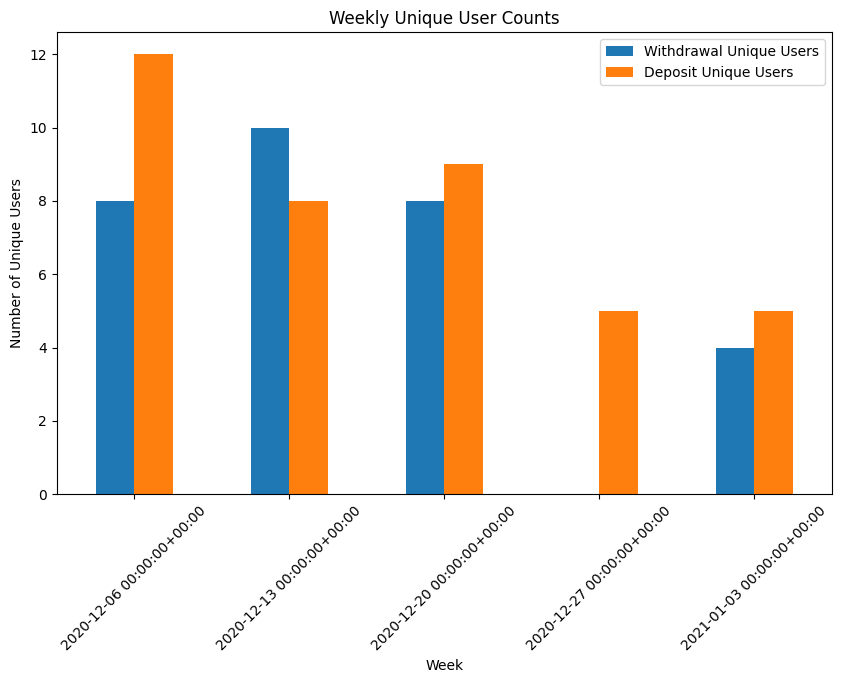

In [18]:
# Filter unique values from the 'user_id' column and group by week in ds_withdrawal and ds_deposit
ds_withdrawal_unique_users = data_frames["ds_withdrawal"].drop_duplicates("user_id")
ds_withdrawal_unique_users['created'] = pd.to_datetime(ds_withdrawal_unique_users['created'])
ds_withdrawal_unique_users_weekly = ds_withdrawal_unique_users.groupby(pd.Grouper(key='created', freq='W'))['user_id'].nunique()

ds_deposit_unique_users = data_frames["ds_deposit"].drop_duplicates("user_id")
ds_deposit_unique_users['created'] = pd.to_datetime(ds_deposit_unique_users['created'])
ds_deposit_unique_users_weekly = ds_deposit_unique_users.groupby(pd.Grouper(key='created', freq='W'))['user_id'].nunique()

# Combine the unique user count results from both DataFrames
combined_unique_users = pd.concat([ds_withdrawal_unique_users_weekly, ds_deposit_unique_users_weekly], axis=1)
combined_unique_users.columns = ['Withdrawal Unique Users', 'Deposit Unique Users']

# Create a new DataFrame with the combined results
combined_unique_users_df = combined_unique_users.reset_index()

# Show the new DataFrame
print("New DataFrame with combined unique user values:")
print(combined_unique_users_df)

# Plot the combined unique user values
combined_unique_users_df.plot(x='created', kind='bar', figsize=(10, 6))
plt.title('Weekly Unique User Counts')
plt.xlabel('Week')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Add the rows of ds_withdrawal to ds_deposit
combined_df = pd.concat([data_frames["ds_withdrawal"], data_frames["ds_deposit"]])

# Show the combined DataFrame
print("Combined DataFrame:")
print(combined_df)

# Filter weekly and get unique 'user_id' values
combined_df['created'] = pd.to_datetime(combined_df['created'])
unique_users_weekly = combined_df.groupby(pd.Grouper(key='created', freq='W'))['user_id'].nunique()

# Show the count of unique users per week
print("Count of unique users per week:")
print(unique_users_weekly)


Combined DataFrame:
                              created  user_id     method currency  amount
0    2020-12-10 18:46:21.384000+00:00     1718  eth_erc20      usd   10.84
1    2020-12-08 17:11:58.036000+00:00     1718  eth_erc20      usd   12.01
2    2020-12-10 21:53:44.504000+00:00     1718         bt      btc    0.01
3    2020-12-01 21:46:25.935000+00:00     1718         bt      eth    1.00
4    2020-12-30 23:52:36.779000+00:00     3309         bt      mxn  200.00
...                               ...      ...        ...      ...     ...
1457 2020-12-22 20:23:33.666000+00:00     8026        adm      btc   11.00
1458 2020-12-22 20:23:33.629000+00:00     8026        adm      bsv   11.00
1459 2020-12-22 20:23:33.593000+00:00     8026        adm      bch   11.00
1460 2020-12-22 20:23:33.534000+00:00     8026        adm      bat    1.00
1461 2020-12-01 02:59:32.967000+00:00     6476       spei      mxn  100.00

[2981 rows x 5 columns]
Count of unique users per week:
created
2020-12-06 00:0

In [20]:
# Merge the 'country_code' column from data_frames["ds_master_user_static"]
combined_df = combined_df.merge(data_frames["ds_master_user_static"][['user_id', 'country_code']], on='user_id', how='left')

# Show the combined DataFrame with 'country_code'
print("Combined DataFrame with 'country_code':")
print(combined_df)


Combined DataFrame with 'country_code':
                              created  user_id     method currency  amount  \
0    2020-12-10 18:46:21.384000+00:00     1718  eth_erc20      usd   10.84   
1    2020-12-08 17:11:58.036000+00:00     1718  eth_erc20      usd   12.01   
2    2020-12-10 21:53:44.504000+00:00     1718         bt      btc    0.01   
3    2020-12-01 21:46:25.935000+00:00     1718         bt      eth    1.00   
4    2020-12-30 23:52:36.779000+00:00     3309         bt      mxn  200.00   
...                               ...      ...        ...      ...     ...   
2976 2020-12-22 20:23:33.666000+00:00     8026        adm      btc   11.00   
2977 2020-12-22 20:23:33.629000+00:00     8026        adm      bsv   11.00   
2978 2020-12-22 20:23:33.593000+00:00     8026        adm      bch   11.00   
2979 2020-12-22 20:23:33.534000+00:00     8026        adm      bat    1.00   
2980 2020-12-01 02:59:32.967000+00:00     6476       spei      mxn  100.00   

     country_code  
0  

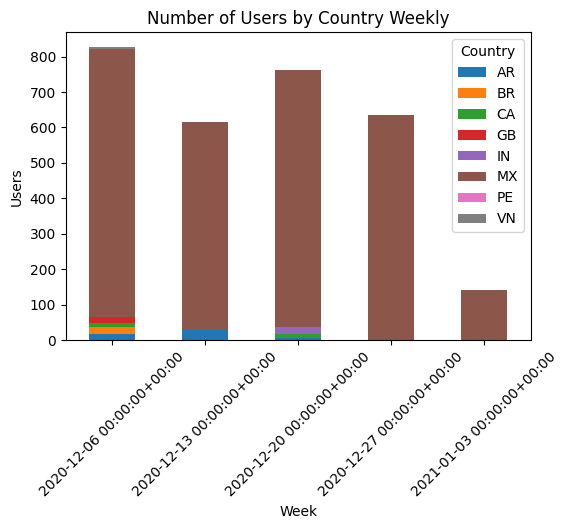

In [21]:
# Convert the 'created' column to datetime format
combined_df['created'] = pd.to_datetime(combined_df['created'])

# Group by week and count rows by 'country_code'
grouped_df = combined_df.groupby([pd.Grouper(key='created', freq='W'), 'country_code']).size().unstack()

# Create a stacked bar plot
grouped_df.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Number of Users by Country Weekly')
plt.xlabel('Week')
plt.ylabel('Users')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


# Revenue

### Get the total weekly revenue divided between trades and withdrawals

Trades

In [22]:
# Create the new DataFrame ds_trade_usd with the selected columns
ds_trade_usd = data_frames["ds_trade"][
    ["created",'major_user_id','minor_user_id', "major_currency", "major_fee", "minor_currency", "minor_fee"]
].copy()

# Display the first 5 rows of the new DataFrame
print("New DataFrame ds_trade_usd:")
print(ds_trade_usd.head())

New DataFrame ds_trade_usd:
                  created  major_user_id  minor_user_id major_currency  \
0 2020-12-05 02:09:46.491           6379           6381            eth   
1 2020-12-29 17:12:13.433           6380           6381            xrp   
2 2020-12-01 12:58:13.639           6379           6380            eth   
3 2020-12-05 13:01:31.952           6377           6381            xrp   
4 2020-12-23 03:36:36.206           6378           6377            btc   

   major_fee minor_currency  minor_fee  
0   0.001648            usd   0.000000  
1   1.018400            usd   0.000000  
2   0.000000            usd  13.991719  
3   1.776228            usd   0.000000  
4   0.000134            mxn   0.000000  


In [23]:
# Convert the 'created' and 'date' columns to datetime objects
ds_trade_usd['created'] = pd.to_datetime(ds_trade_usd['created'])
data_frames["ds_price_data"]['date'] = pd.to_datetime(data_frames["ds_price_data"]['date'])

# Create a new column 'fee_usd_major' in ds_trade_usd
ds_trade_usd['fee_usd_major'] = None

# Iterate over each row in ds_trade_usd
for index, row in ds_trade_usd.iterrows():
    # Filter data_frames["ds_price_data"] based on the major_currency and created date
    filtered_price_data = data_frames["ds_price_data"][
        (data_frames["ds_price_data"]['major_currency'] == row['major_currency']) &
        (data_frames["ds_price_data"]['date'] <= row['created'])
    ]

    if not filtered_price_data.empty:
        # Find the row with the closest date
        closest_row = filtered_price_data.loc[
            (filtered_price_data['date'] - row['created']).abs().idxmin()
        ]

        # Assign the 'usd' value to the 'fee_usd_major' column
        ds_trade_usd.at[index, 'fee_usd_major'] = closest_row['usd']

# Display the updated ds_trade_usd DataFrame
print("DataFrame ds_trade_usd actualizado:")
print(ds_trade_usd)


DataFrame ds_trade_usd actualizado:
                      created  major_user_id  minor_user_id major_currency  \
0     2020-12-05 02:09:46.491           6379           6381            eth   
1     2020-12-29 17:12:13.433           6380           6381            xrp   
2     2020-12-01 12:58:13.639           6379           6380            eth   
3     2020-12-05 13:01:31.952           6377           6381            xrp   
4     2020-12-23 03:36:36.206           6378           6377            btc   
...                       ...            ...            ...            ...   
77256 2020-12-25 03:30:50.661           6381           6377            xrp   
77257 2020-12-12 13:58:52.836           6380           6379            xrp   
77258 2020-12-08 12:32:43.037           6379           6380            eth   
77259 2020-12-29 13:26:30.851           6380           6378           tusd   
77260 2020-12-30 20:56:01.809           6380           6379            xrp   

       major_fee minor_curr

In [24]:
# Convert the 'created' and 'date' columns to datetime objects
ds_trade_usd['created'] = pd.to_datetime(ds_trade_usd['created'])
data_frames["ds_price_data"]['date'] = pd.to_datetime(data_frames["ds_price_data"]['date'])

# Create a new column 'fee_usd_minor' in ds_trade_usd
ds_trade_usd['fee_usd_minor'] = None

# Iterate over each row in ds_trade_usd
for index, row in ds_trade_usd.iterrows():
    # Filter data_frames["ds_price_data"] based on the created date and matching minor_currency to major_currency
    filtered_price_data = data_frames["ds_price_data"][
        (data_frames["ds_price_data"]['date'] <= row['created']) &
        (data_frames["ds_price_data"]['major_currency'] == row['minor_currency'])
    ]

    if not filtered_price_data.empty:
        # Find the row with the closest date
        closest_row = filtered_price_data.loc[
            (filtered_price_data['date'] - row['created']).abs().idxmin()
        ]

        # Assign the 'usd' value to the 'fee_usd_minor' column
        ds_trade_usd.at[index, 'fee_usd_minor'] = closest_row['usd']

# Display the updated ds_trade_usd DataFrame
print("DataFrame ds_trade_usd updated with fee_usd_minor:")
print(ds_trade_usd)


DataFrame ds_trade_usd updated with fee_usd_minor:
                      created  major_user_id  minor_user_id major_currency  \
0     2020-12-05 02:09:46.491           6379           6381            eth   
1     2020-12-29 17:12:13.433           6380           6381            xrp   
2     2020-12-01 12:58:13.639           6379           6380            eth   
3     2020-12-05 13:01:31.952           6377           6381            xrp   
4     2020-12-23 03:36:36.206           6378           6377            btc   
...                       ...            ...            ...            ...   
77256 2020-12-25 03:30:50.661           6381           6377            xrp   
77257 2020-12-12 13:58:52.836           6380           6379            xrp   
77258 2020-12-08 12:32:43.037           6379           6380            eth   
77259 2020-12-29 13:26:30.851           6380           6378           tusd   
77260 2020-12-30 20:56:01.809           6380           6379            xrp   

       major

In [25]:
# Convert the 'major_fee' and 'minor_fee' columns to numeric
ds_trade_usd['major_fee'] = pd.to_numeric(ds_trade_usd['major_fee'], errors='coerce')
ds_trade_usd['minor_fee'] = pd.to_numeric(ds_trade_usd['minor_fee'], errors='coerce')

# Calculate 'fee_usd_major' multiplied by 'major_fee'
ds_trade_usd['major_fee_usd'] = ds_trade_usd['fee_usd_major'] * ds_trade_usd['major_fee']

# Calculate 'fee_usd_minor' multiplied by 'minor_fee'
ds_trade_usd['minor_fee_usd'] = ds_trade_usd['fee_usd_minor'] * ds_trade_usd['minor_fee']

# Sum the calculated values and create the 'fee_usd' column
ds_trade_usd['fee_usd'] = ds_trade_usd['major_fee_usd'] + ds_trade_usd['minor_fee_usd']

# Display the updated ds_trade_usd DataFrame
print("DataFrame ds_trade_usd updated with fee_usd:")
print(ds_trade_usd)



DataFrame ds_trade_usd updated with fee_usd:
                      created  major_user_id  minor_user_id major_currency  \
0     2020-12-05 02:09:46.491           6379           6381            eth   
1     2020-12-29 17:12:13.433           6380           6381            xrp   
2     2020-12-01 12:58:13.639           6379           6380            eth   
3     2020-12-05 13:01:31.952           6377           6381            xrp   
4     2020-12-23 03:36:36.206           6378           6377            btc   
...                       ...            ...            ...            ...   
77256 2020-12-25 03:30:50.661           6381           6377            xrp   
77257 2020-12-12 13:58:52.836           6380           6379            xrp   
77258 2020-12-08 12:32:43.037           6379           6380            eth   
77259 2020-12-29 13:26:30.851           6380           6378           tusd   
77260 2020-12-30 20:56:01.809           6380           6379            xrp   

       major_fee m

In [26]:
ds_trade_total = ds_trade_usd.copy()

In [27]:
# Select only the desired columns
columns_to_keep = ['created', 'major_user_id', 'minor_user_id', 'fee_usd']
ds_trade_usd = ds_trade_usd[columns_to_keep]

# Display the updated ds_trade_usd DataFrame
print("DataFrame ds_trade_usd with selected columns:")
print(ds_trade_usd)

DataFrame ds_trade_usd with selected columns:
                      created  major_user_id  minor_user_id    fee_usd
0     2020-12-05 02:09:46.491           6379           6381   0.967632
1     2020-12-29 17:12:13.433           6380           6381   0.221604
2     2020-12-01 12:58:13.639           6379           6380  13.991719
3     2020-12-05 13:01:31.952           6377           6381   1.035186
4     2020-12-23 03:36:36.206           6378           6377    3.20678
...                       ...            ...            ...        ...
77256 2020-12-25 03:30:50.661           6381           6377   0.526224
77257 2020-12-12 13:58:52.836           6380           6379  54.153108
77258 2020-12-08 12:32:43.037           6379           6380   1.652797
77259 2020-12-29 13:26:30.851           6380           6378   0.145768
77260 2020-12-30 20:56:01.809           6380           6379   4.769351

[77261 rows x 4 columns]


<ipython-input-28-bdda8c451657>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_trade_usd['created'] = pd.to_datetime(ds_trade_usd['created'])


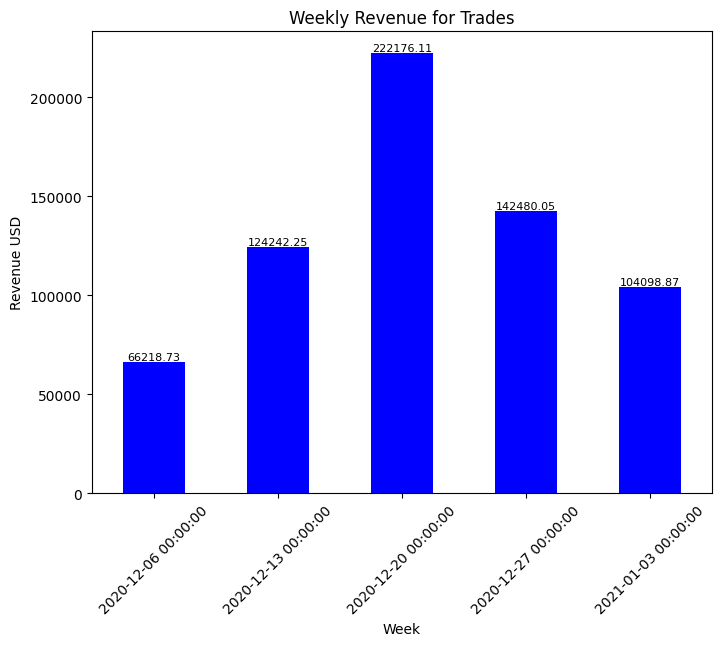

In [28]:

# Convert the 'created' column to datetime type if it's not already
ds_trade_usd['created'] = pd.to_datetime(ds_trade_usd['created'])

# Filter and sum the weekly data
weekly_revenue = ds_trade_usd.groupby(pd.Grouper(key='created', freq='W'))['fee_usd'].sum()

# Plot the weekly revenue for trades
plt.figure(figsize=(8, 6))
ax = weekly_revenue.plot(kind='bar', color='blue')
plt.title('Weekly Revenue for Trades')
plt.xlabel('Week')
plt.ylabel('Revenue USD')
plt.xticks(rotation=45)

# Add labels to the bars
for i, v in enumerate(weekly_revenue):
    ax.text(i, v + 10, str(round(v, 2)), ha='center', va='bottom', fontsize=8)

plt.show()


Withdrawals

In [29]:
# Quick data cleaning is performed, and the table is created from the 'BI Challenge' file.

# Create the withdrawals_fee table
withdrawals_fee = pd.DataFrame({
    'METHOD': [
        'BAT (BAT)',
        'Bitcoin cash (BCH) *',
        'Bitcoin (BTC)',
        'Dai (DAI) *',
        'Ether (ETA) *',
        'Litecoin (LTC)',
        'MANA (MANA) •',
        'TrueUSD (TUSD) *',
        'Tether *',
        'XRP (XRP)'
    ],
    'FEE': [
        7.07686249,
        0.00009281,
        0.00001248,
        507,
        0.0000444,
        0.00000998,
        6.86132352,
        581,
        4.00,
        0
    ],
    'CURRENCY': [
        'BAT',
        'BCH',
        'BTC',
        'DAI',
        'ETH',
        'LTC',
        'MANA',
        'TUSD',
        'USDT',
        '0'
    ]
})

# Convert 'CURRENCY' values to lowercase and remove spaces
withdrawals_fee['CURRENCY'] = [currency.lower().replace(" ", "") for currency in withdrawals_fee['CURRENCY']]


# Display the withdrawals_fee table
print("withdrawals_fee table:")
print(withdrawals_fee)


withdrawals_fee table:
                 METHOD         FEE CURRENCY
0             BAT (BAT)    7.076862      bat
1  Bitcoin cash (BCH) *    0.000093      bch
2         Bitcoin (BTC)    0.000012      btc
3           Dai (DAI) *  507.000000      dai
4         Ether (ETA) *    0.000044      eth
5        Litecoin (LTC)    0.000010      ltc
6         MANA (MANA) •    6.861324     mana
7      TrueUSD (TUSD) *  581.000000     tusd
8              Tether *    4.000000     usdt
9             XRP (XRP)    0.000000        0


In [30]:
# Create a dictionary mapping currency to fee
currency_fee_mapping = dict(zip(withdrawals_fee['CURRENCY'], withdrawals_fee['FEE']))

# Create the 'fee_currency' column in ds_withdrawal using the mapping
data_frames["ds_withdrawal"]['fee_currency'] = data_frames["ds_withdrawal"]['currency'].map(currency_fee_mapping)

# Display the first few rows of the updated DataFrame
print("DataFrame ds_withdrawal with the 'fee_currency' column added:")
print(data_frames["ds_withdrawal"].head())


DataFrame ds_withdrawal with the 'fee_currency' column added:
                           created  user_id     method currency  amount  \
0 2020-12-10 18:46:21.384000+00:00     1718  eth_erc20      usd   10.84   
1 2020-12-08 17:11:58.036000+00:00     1718  eth_erc20      usd   12.01   
2 2020-12-10 21:53:44.504000+00:00     1718         bt      btc    0.01   
3 2020-12-01 21:46:25.935000+00:00     1718         bt      eth    1.00   
4 2020-12-30 23:52:36.779000+00:00     3309         bt      mxn  200.00   

   fee_currency  
0           NaN  
1           NaN  
2      0.000012  
3      0.000044  
4           NaN  


In [31]:
data_frames["ds_withdrawal"]

,created,user_id,method,currency,amount,fee_currency
0,2020-12-10 18:46:21.384000+00:00,1718,eth_erc20,usd,10.84,NaN
1,2020-12-08 17:11:58.036000+00:00,1718,eth_erc20,usd,12.01,NaN
2,2020-12-10 21:53:44.504000+00:00,1718,bt,btc,0.01,0.000012
3,2020-12-01 21:46:25.935000+00:00,1718,bt,eth,1.00,0.000044
4,2020-12-30 23:52:36.779000+00:00,3309,bt,mxn,200.00,NaN
...,...,...,...,...,...,...
1514,2020-12-08 17:05:43.594000+00:00,7760,pts,btc,5.00,0.000012
1515,2020-12-08 15:53:28.916000+00:00,7760,pts,usd,10000.00,NaN
1516,2020-12-08 15:53:28.881000+00:00,7760,pts,mxn,100000.00,NaN
1517,2020-12-08 15:53:28.846000+00:00,7760,pts,eth,100.00,0.000044


In [32]:
# Assuming data_frames["ds_price_data"] and data_frames["ds_withdrawal"] are already loaded

# Convert date columns to datetime without timezone information
data_frames["ds_price_data"]["date"] = pd.to_datetime(data_frames["ds_price_data"]["date"]).dt.tz_localize(None)
data_frames["ds_withdrawal"]["created"] = pd.to_datetime(data_frames["ds_withdrawal"]["created"]).dt.tz_localize(None)

# Create a function to find the closest date and corresponding 'usd' value
def find_closest_usd(row):
    closest_date = data_frames["ds_price_data"]["date"].min()  # Initialize with the minimum date
    closest_usd = 0  # Initialize with 0
    for _, price_row in data_frames["ds_price_data"].iterrows():
        if abs((row["created"] - price_row["date"]).days) < abs((row["created"] - closest_date).days):
            closest_date = price_row["date"]
            closest_usd = price_row["usd"]
    return closest_usd

# Apply the function to calculate 'fee_usd' for each row
data_frames["ds_withdrawal"]["fee_usd"] = data_frames["ds_withdrawal"].apply(find_closest_usd, axis=1)

# Multiply 'fee_currency' by 'fee_usd' to calculate the final 'fee_usd' column
data_frames["ds_withdrawal"]["fee_usd"] = data_frames["ds_withdrawal"]["fee_currency"] * data_frames["ds_withdrawal"]["fee_usd"]

# Display the updated data_frames["ds_withdrawal"] DataFrame with the 'fee_usd' column
print("Updated ds_withdrawal DataFrame with 'fee_usd' column:")
print(data_frames["ds_withdrawal"])

Updated ds_withdrawal DataFrame with 'fee_usd' column:
                     created  user_id     method currency     amount  \
0    2020-12-10 18:46:21.384     1718  eth_erc20      usd      10.84   
1    2020-12-08 17:11:58.036     1718  eth_erc20      usd      12.01   
2    2020-12-10 21:53:44.504     1718         bt      btc       0.01   
3    2020-12-01 21:46:25.935     1718         bt      eth       1.00   
4    2020-12-30 23:52:36.779     3309         bt      mxn     200.00   
...                      ...      ...        ...      ...        ...   
1514 2020-12-08 17:05:43.594     7760        pts      btc       5.00   
1515 2020-12-08 15:53:28.916     7760        pts      usd   10000.00   
1516 2020-12-08 15:53:28.881     7760        pts      mxn  100000.00   
1517 2020-12-08 15:53:28.846     7760        pts      eth     100.00   
1518 2020-12-08 15:53:28.799     7760        pts      btc      12.00   

      fee_currency   fee_usd  
0              NaN       NaN  
1              NaN

In [33]:
ds_withdrawal_total = data_frames["ds_withdrawal"].copy()

In [34]:
ds_withdrawal_total

,created,user_id,method,currency,amount,fee_currency,fee_usd
0,2020-12-10 18:46:21.384,1718,eth_erc20,usd,10.84,NaN,NaN
1,2020-12-08 17:11:58.036,1718,eth_erc20,usd,12.01,NaN,NaN
2,2020-12-10 21:53:44.504,1718,bt,btc,0.01,0.000012,0.000946
3,2020-12-01 21:46:25.935,1718,bt,eth,1.00,0.000044,0.000000
4,2020-12-30 23:52:36.779,3309,bt,mxn,200.00,NaN,NaN
...,...,...,...,...,...,...,...
1514,2020-12-08 17:05:43.594,7760,pts,btc,5.00,0.000012,0.000013
1515,2020-12-08 15:53:28.916,7760,pts,usd,10000.00,NaN,NaN
1516,2020-12-08 15:53:28.881,7760,pts,mxn,100000.00,NaN,NaN
1517,2020-12-08 15:53:28.846,7760,pts,eth,100.00,0.000044,0.000045


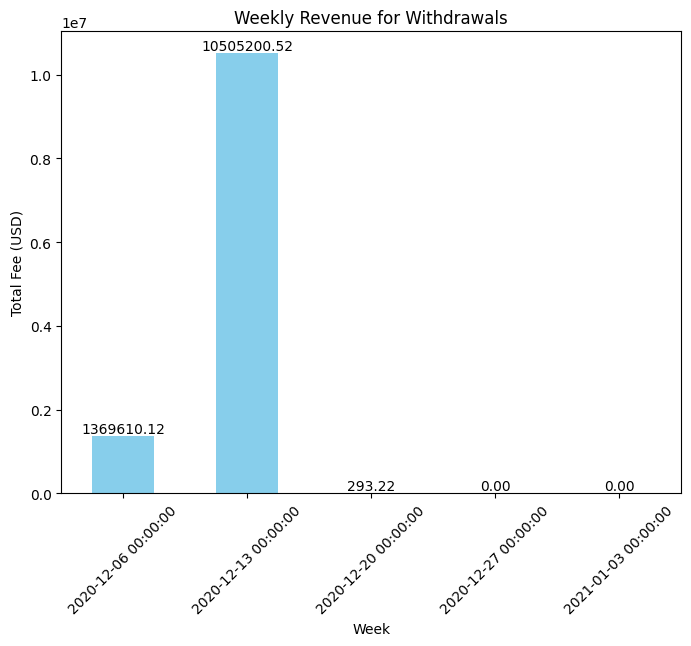

In [35]:

# Convert the 'created' column to datetime if it's not already
data_frames["ds_withdrawal"]["created"] = pd.to_datetime(data_frames["ds_withdrawal"]["created"])

# Group and sum the 'fee_usd' column weekly
weekly_fee_sum = data_frames["ds_withdrawal"].groupby(pd.Grouper(key='created', freq='W'))['fee_usd'].sum()

# Plot the weekly fee sum
plt.figure(figsize=(8, 6))
weekly_fee_sum.plot(kind='bar', color='skyblue')
plt.title('Weekly Revenue for Withdrawals')
plt.xlabel('Week')
plt.ylabel('Total Fee (USD)')
plt.xticks(rotation=45)

# Add labels to each bar
for i, v in enumerate(weekly_fee_sum):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


"Some withdrawal fee data is not found in the list; these values are assumed as NaNs or zeros. This may potentially impact the final results when conducting a revenue study. The options could include considering an arbitrary percentage for withdrawals not listed or assigning a fixed dollar value. For the sake of consistency with other reports, we have chosen to set these values to 0. However, my preferred option would have been to assign a fixed value, approximately 3 USD, for withdrawals in dollars, similar to USDT."

In [36]:
weekly_fee_sum

created
2020-12-06    1.369610e+06
2020-12-13    1.050520e+07
2020-12-20    2.932194e+02
2020-12-27    0.000000e+00
2021-01-03    4.383209e-03
Freq: W-SUN, Name: fee_usd, dtype: float64

### How many paying users do we have each week

In [37]:
# Select the necessary columns in ds_trade_total
selected_columns_major = ['created', 'major_user_id', 'major_fee_usd']
selected_columns_minor = ['created', 'minor_user_id', 'minor_fee_usd']

# Create separate DataFrames for major and minor columns
df_major = ds_trade_total[selected_columns_major].copy()
df_minor = ds_trade_total[selected_columns_minor].copy()

# Rename the columns in df_major and df_minor
df_major.columns = ['created', 'user_id', 'fee_usd']
df_minor.columns = ['created', 'user_id', 'fee_usd']

# Concatenate both DataFrames to combine the rows
combined_df = pd.concat([df_major, df_minor], ignore_index=True)

# Display the resulting DataFrame
print("Combined DataFrame:")
print(combined_df)



Combined DataFrame:
                       created  user_id    fee_usd
0      2020-12-05 02:09:46.491     6379   0.967632
1      2020-12-29 17:12:13.433     6380   0.221604
2      2020-12-01 12:58:13.639     6379        0.0
3      2020-12-05 13:01:31.952     6377   1.035186
4      2020-12-23 03:36:36.206     6378    3.20678
...                        ...      ...        ...
154517 2020-12-25 03:30:50.661     6377     0.2997
154518 2020-12-12 13:58:52.836     6379  30.576044
154519 2020-12-08 12:32:43.037     6380    0.71768
154520 2020-12-29 13:26:30.851     6378        0.0
154521 2020-12-30 20:56:01.809     6379   2.006851

[154522 rows x 3 columns]


In [38]:
#Adding withdrawal to the DF
df_withdrawal_resume = ds_withdrawal_total[['created', 'user_id', 'fee_usd']].copy()

trades_withdrawal_users = pd.concat([combined_df, df_withdrawal_resume], ignore_index=True)

print("Combined DataFrame:")
print(trades_withdrawal_users)


Combined DataFrame:
                       created  user_id   fee_usd
0      2020-12-05 02:09:46.491     6379  0.967632
1      2020-12-29 17:12:13.433     6380  0.221604
2      2020-12-01 12:58:13.639     6379       0.0
3      2020-12-05 13:01:31.952     6377  1.035186
4      2020-12-23 03:36:36.206     6378   3.20678
...                        ...      ...       ...
156036 2020-12-08 17:05:43.594     7760  0.000013
156037 2020-12-08 15:53:28.916     7760       NaN
156038 2020-12-08 15:53:28.881     7760       NaN
156039 2020-12-08 15:53:28.846     7760  0.000045
156040 2020-12-08 15:53:28.799     7760  0.000013

[156041 rows x 3 columns]


In [39]:
import pandas as pd

# Convert 'created' column to datetime
trades_withdrawal_users['created'] = pd.to_datetime(trades_withdrawal_users['created'])

# Add a 'check' column with 'True' for rows where 'fee_usd' > 0
trades_withdrawal_users['check'] = trades_withdrawal_users['fee_usd'] > 0

# Keep only rows with unique 'user_id'
filtered_trades_withdrawal_users = trades_withdrawal_users.drop_duplicates(subset='user_id')

# Display the resulting DataFrame
print(filtered_trades_withdrawal_users)


                       created  user_id      fee_usd  check
0      2020-12-05 02:09:46.491     6379     0.967632   True
1      2020-12-29 17:12:13.433     6380     0.221604   True
3      2020-12-05 13:01:31.952     6377     1.035186   True
4      2020-12-23 03:36:36.206     6378      3.20678   True
7      2020-12-22 14:28:14.573     6911      0.00193   True
10     2020-12-31 14:06:24.689     6381     0.299798   True
670    2020-12-04 20:39:10.672     7547    37.937404   True
1239   2020-12-02 22:03:34.425     4081     0.001504   True
2594   2020-12-30 17:32:28.358     7268          0.0  False
3279   2020-12-08 20:14:31.876     6237          0.0  False
5145   2020-12-21 11:55:38.673     7895          0.0  False
8677   2020-12-24 17:21:56.225     6009     0.562636   True
9740   2020-12-03 20:23:52.700     1672     7.495431   True
13243  2020-12-09 17:50:29.751     1782          0.0  False
13746  2020-12-22 14:28:32.016     6922     0.003709   True
14005  2020-12-04 16:28:08.069     4981 

In [40]:
# Filter the DataFrame to keep only rows where 'check' is True
paying_users = filtered_trades_withdrawal_users[filtered_trades_withdrawal_users['check'] == True]

# Convert the 'created' column to datetime
paying_users['created'] = pd.to_datetime(paying_users['created'])

# Group by week using the 'created' column and count 'True' values in the 'paying_users' column
weekly_counts = paying_users.groupby(pd.Grouper(key='created', freq='W'))['check'].sum()

# Filter for weeks where there are paying users
filtered_weekly_counts = weekly_counts[weekly_counts > 0]

# Display the resulting DataFrame
print(filtered_weekly_counts)



created
2020-12-06    10
2020-12-20     5
2020-12-27     7
2021-01-03     3
Name: check, dtype: int64


<ipython-input-40-9028cd62cf9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paying_users['created'] = pd.to_datetime(paying_users['created'])


In [41]:
# Create the table 'weekly_paying_users'
weekly_paying_users = pd.DataFrame({
    'created': [
        '2020-12-06',
        '2020-12-13',
        '2020-12-20',
        '2020-12-27',
        '2021-01-03'
    ],
    'users': [10, 0, 5, 7, 3]
})

# Convert the 'created' column to datetime
weekly_paying_users['created'] = pd.to_datetime(weekly_paying_users['created'])

# Display the table
print("weekly_paying_users table:")
print(weekly_paying_users)

# Print the legend
print("Note: Since there is a week with a null value, the table is adjusted to match the indices.")


weekly_paying_users table:
     created  users
0 2020-12-06     10
1 2020-12-13      0
2 2020-12-20      5
3 2020-12-27      7
4 2021-01-03      3
Note: Since there is a week with a null value, the table is adjusted to match the indices.


### Get the weekly ARPU (average revenue per user) and ARPPU (average revenue per paying user).

In [42]:
filtered_trades_withdrawal_users

,created,user_id,fee_usd,check
0,2020-12-05 02:09:46.491,6379,0.967632,True
1,2020-12-29 17:12:13.433,6380,0.221604,True
3,2020-12-05 13:01:31.952,6377,1.035186,True
4,2020-12-23 03:36:36.206,6378,3.20678,True
7,2020-12-22 14:28:14.573,6911,0.00193,True
10,2020-12-31 14:06:24.689,6381,0.299798,True
670,2020-12-04 20:39:10.672,7547,37.937404,True
1239,2020-12-02 22:03:34.425,4081,0.001504,True
2594,2020-12-30 17:32:28.358,7268,0.0,False
3279,2020-12-08 20:14:31.876,6237,0.0,False


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named filtered_trades_withdrawal_users

# Convert 'created' column to DateTime if it's not already
filtered_trades_withdrawal_users['created'] = pd.to_datetime(filtered_trades_withdrawal_users['created'])

# Set 'created' column as the index
filtered_trades_withdrawal_users.set_index('created', inplace=True)

# Resample the DataFrame by week, perform count and mean operations
weekly_total_users2 = filtered_trades_withdrawal_users.resample('W').agg({'user_id': 'count', 'fee_usd': 'mean'})

# Calculate ARPU (Average Revenue Per User)
weekly_total_users2['ARPU'] = weekly_total_users2['fee_usd'] / weekly_total_users2['user_id']

# Select the columns 'user_id', 'fee_usd', and 'ARPU'
weekly_total_users2 = weekly_total_users2[['user_id', 'fee_usd', 'ARPU']]

# Display the resulting DataFrame
print(weekly_total_users2)



            user_id       fee_usd        ARPU
created                                      
2020-12-06       17  11496.349617  676.255860
2020-12-13       13      0.000000    0.000000
2020-12-20       12     33.436432    2.786369
2020-12-27        9      1.056495    0.117388
2021-01-03        7      0.146604    0.020943


<ipython-input-43-741ed4f182f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trades_withdrawal_users['created'] = pd.to_datetime(filtered_trades_withdrawal_users['created'])


In [44]:
import pandas as pd

# Assuming you have a DataFrame named paying_users

# Convert 'created' column to DateTime if it's not already
paying_users['created'] = pd.to_datetime(paying_users['created'])

# Set 'created' column as the index
paying_users.set_index('created', inplace=True)

# Resample the DataFrame by week, perform count and mean operations
weekly_paying_users2 = paying_users.resample('W').agg({'user_id': 'count', 'fee_usd': 'mean'})

# Calculate ARPPU (Average Revenue Per Paying User)
weekly_paying_users2['ARPPU'] = weekly_paying_users2['fee_usd'] / weekly_paying_users2['user_id']

# Select the columns 'user_id', 'fee_usd', and 'ARPPU'
weekly_paying_users2 = weekly_paying_users2[['user_id', 'fee_usd', 'ARPPU']]

# Display the resulting DataFrame
print(weekly_paying_users2)


            user_id       fee_usd        ARPPU
created                                       
2020-12-06       10  17244.524426  1724.452443
2020-12-13        0           NaN          NaN
2020-12-20        5     60.185578    12.037116
2020-12-27        7      1.358351     0.194050
2021-01-03        3      0.244341     0.081447


<ipython-input-44-acf6378309a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paying_users['created'] = pd.to_datetime(paying_users['created'])


# BONUS

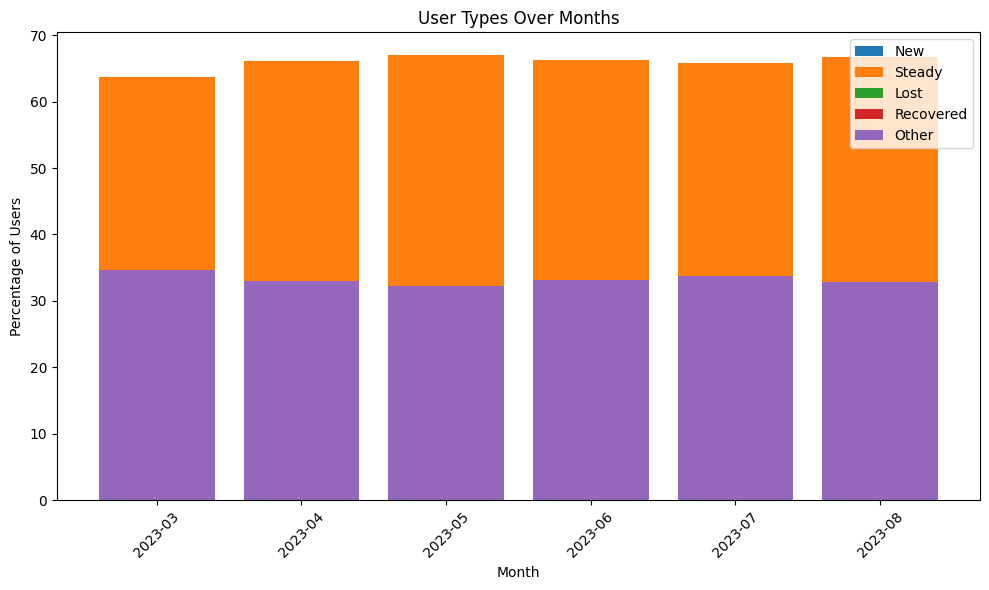

In [45]:
# Rename the 'user_ud' column to 'user_id'
data_frames["ds_user_balance"].rename(columns={'user_ud': 'user_id'}, inplace=True)

# Create a DataFrame with the provided data
df = data_frames["ds_user_balance"]

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Add a 'month' column for the corresponding month
df['month'] = df['date'].dt.to_period('M')

# Create columns for each user type
df['New'] = (df.groupby('user_id')['balance_usd'].shift(0) <= 0) & (df.groupby('user_id')['balance_usd'].shift(-1) > 0)
df['Steady'] = (df.groupby('user_id')['balance_usd'].shift(0) > 0) & (df.groupby('user_id')['balance_usd'].shift(-1) > 0)
df['Lost'] = (df.groupby('user_id')['balance_usd'].shift(0) > 0) & (df.groupby('user_id')['balance_usd'].shift(-1) == 0)
df['Recovered'] = (df.groupby('user_id')['balance_usd'].shift(0) <= 0) & (df.groupby('user_id')['balance_usd'].shift(-1) > 0)

# Add a new column 'Other' that will be True if none of the previous categories are True
df['Other'] = ~(df['New'] | df['Steady'] | df['Lost'] | df['Recovered'])

# Update the 'Other' column to be False if any of the other categories are True
df.loc[df['New'] | df['Steady'] | df['Lost'] | df['Recovered'], 'Other'] = False

# Group by month and count the number of users for each type, including 'Other'
monthly_counts = df.groupby('month')[['New', 'Steady', 'Lost', 'Recovered', 'Other']].sum()

# Normalize the values to obtain percentages
monthly_percentage = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100

# Convert the index periods to strings for the x-axis
monthly_percentage.index = monthly_percentage.index.strftime('%Y-%m')

# Create a stacked bar chart
plt.figure(figsize=(10, 6))

for col in monthly_percentage.columns:
    plt.bar(monthly_percentage.index, monthly_percentage[col], label=col)

plt.xlabel('Month')
plt.ylabel('Percentage of Users')
plt.title('User Types Over Months')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


In [46]:
df

,date,user_id,balance_usd,month,New,Steady,Lost,Recovered,Other
0,2023-08-20,8282063,0.0000,2023-08,False,False,False,False,True
1,2023-08-20,8498396,0.0000,2023-08,False,False,False,False,True
2,2023-08-20,8575062,9.2211,2023-08,False,True,False,False,False
3,2023-08-20,8748959,7.5947,2023-08,False,True,False,False,False
4,2023-08-20,8732809,0.0000,2023-08,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1044167,2023-03-01,8232234,724.1603,2023-03,False,False,False,False,True
1044168,2023-03-01,8228820,0.0000,2023-03,False,False,False,False,True
1044169,2023-03-01,8231824,0.0000,2023-03,False,False,False,False,True
1044170,2023-03-01,8231868,141.4161,2023-03,False,False,False,False,True


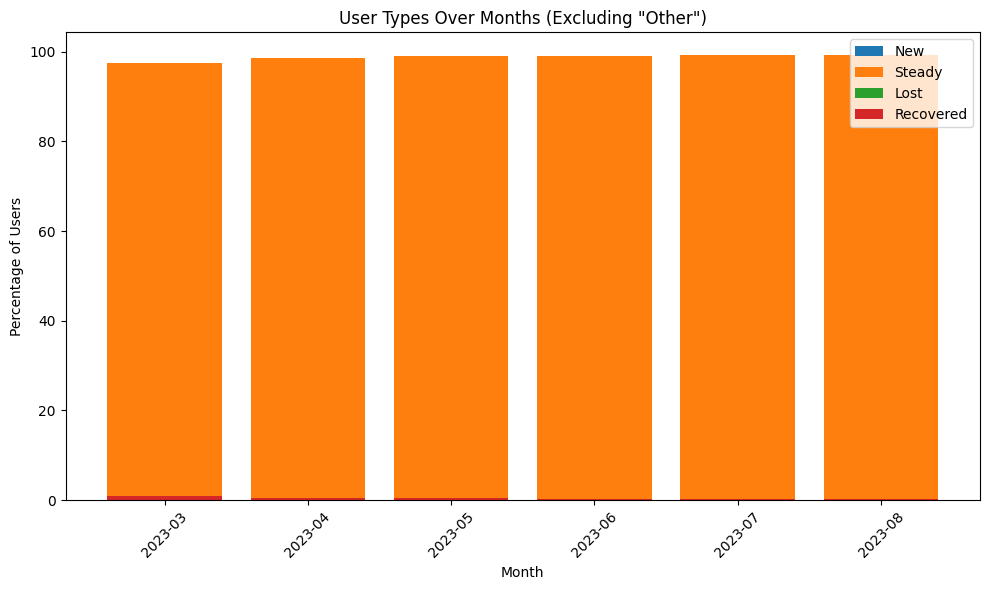

In [47]:
# Rename the 'user_ud' column to 'user_id'
data_frames["ds_user_balance"].rename(columns={'user_ud': 'user_id'}, inplace=True)

# Create a DataFrame with the provided data
df = data_frames["ds_user_balance"]

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Add a 'month' column for the corresponding month
df['month'] = df['date'].dt.to_period('M')

# Create columns for each type of user
df['New'] = (df.groupby('user_id')['balance_usd'].shift(0) <= 0) & (df.groupby('user_id')['balance_usd'].shift(-1) > 0)
df['Steady'] = (df.groupby('user_id')['balance_usd'].shift(0) > 0) & (df.groupby('user_id')['balance_usd'].shift(-1) > 0)
df['Lost'] = (df.groupby('user_id')['balance_usd'].shift(0) > 0) & (df.groupby('user_id')['balance_usd'].shift(-1) == 0)
df['Recovered'] = (df.groupby('user_id')['balance_usd'].shift(0) <= 0) & (df.groupby('user_id')['balance_usd'].shift(-1) > 0)

# Add a new column 'Other' that will be True if none of the previous categories is True
df['Other'] = ~(df['New'] | df['Steady'] | df['Lost'] | df['Recovered'])

# Update the 'Other' column to be False if any of the other categories are True
df.loc[df['New'] | df['Steady'] | df['Lost'] | df['Recovered'], 'Other'] = False

# Filter the DataFrame, excluding users where 'Other' is True
df_filtered = df[~df['Other']]

# Group by month and count the number of users for each type, excluding 'Other'
monthly_counts = df_filtered.groupby('month')[['New', 'Steady', 'Lost', 'Recovered']].sum()

# Normalize the values to obtain percentages
monthly_percentage = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100

# Convert the index periods to strings for the x-axis
monthly_percentage.index = monthly_percentage.index.strftime('%Y-%m')

# Create a stacked bar chart
plt.figure(figsize=(10, 6))

for col in monthly_percentage.columns:
    plt.bar(monthly_percentage.index, monthly_percentage[col], label=col)

plt.xlabel('Month')
plt.ylabel('Percentage of Users')
plt.title('User Types Over Months (Excluding "Other")')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

